# Boston crimes : data viz for presentation

## Imports & load data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the dataset
from data import load_data_viz_data

data = load_data_viz_data()
data[['LAT','LONG']] = data[['LAT','LONG']].astype('float64')

print("Shape of the DataFrame:", data.shape)

data.head()

Shape of the DataFrame: (237221, 9)


,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION
0,I192068249,Other,0,2015-08-28 10:20:00,42.330119,-71.084251,Roxbury,42.328894,-71.085359
1,I182074094,Violence and harassment,0,2015-09-14 09:31:00,42.315142,-71.067047,Roxbury,42.328894,-71.085359
2,I182054888,Violence and harassment,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
3,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
4,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237221 entries, 0 to 237220
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      237221 non-null  object 
 1   OFFENSE_CODE_GROUP   237221 non-null  object 
 2   SHOOTING             237221 non-null  int64  
 3   OCCURRED_ON_DATE     237221 non-null  object 
 4   LAT                  237221 non-null  float64
 5   LONG                 237221 non-null  float64
 6   NAME                 237221 non-null  object 
 7   LAT_POLICE_STATION   237221 non-null  float64
 8   LONG_POLICE_STATION  237221 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.1+ MB


# Most common category of incident in the district 

In [9]:
most_rep_incident = pd.DataFrame(data.groupby(by='NAME', axis=0)['OFFENSE_CODE_GROUP'].agg(pd.Series.mode))
print(most_rep_incident.shape)
most_rep_incident

(12, 1)


,OFFENSE_CODE_GROUP
NAME,
Brighton,Larceny and vandalism
Charlestown,Larceny and vandalism
Dorchester,Larceny and vandalism
Downtown,Larceny and vandalism
East Boston,Larceny and vandalism
Hyde Park,Larceny and vandalism
Jamaica Plain,Larceny and vandalism
Mattapan,Police investigation procedure
Roxbury,Larceny and vandalism


In [10]:
# second most common offense in the Brighton district?
data[data['NAME'] == 'Brighton'].groupby(by='OFFENSE_CODE_GROUP', axis=0).count().sort_values(by='INCIDENT_NUMBER', ascending=False)

,INCIDENT_NUMBER,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION
OFFENSE_CODE_GROUP,,,,,,,,
Larceny and vandalism,5274,5274,5274,5274,5274,5274,5274,5274
Police investigation procedure,2783,2783,2783,2783,2783,2783,2783,2783
Fraud and law violations,1807,1807,1807,1807,1807,1807,1807,1807
Violence and harassment,1627,1627,1627,1627,1627,1627,1627,1627
Other,925,925,925,925,925,925,925,925
Drugs and disorderly conduct,809,809,809,809,809,809,809,809
Disputes,563,563,563,563,563,563,563,563


## Cleaning

In [11]:
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION
0,I192068249,Other,0,2015-08-28 10:20:00,42.330119,-71.084251,Roxbury,42.328894,-71.085359
1,I182074094,Violence and harassment,0,2015-09-14 09:31:00,42.315142,-71.067047,Roxbury,42.328894,-71.085359
2,I182054888,Violence and harassment,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
3,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
4,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359


In [12]:
# Convert OCCURED_ON_DATE to datetime
data['OCCURRED_ON_DATE'] = pd.to_datetime(data['OCCURRED_ON_DATE'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237221 entries, 0 to 237220
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      237221 non-null  object        
 1   OFFENSE_CODE_GROUP   237221 non-null  object        
 2   SHOOTING             237221 non-null  int64         
 3   OCCURRED_ON_DATE     237221 non-null  datetime64[ns]
 4   LAT                  237221 non-null  float64       
 5   LONG                 237221 non-null  float64       
 6   NAME                 237221 non-null  object        
 7   LAT_POLICE_STATION   237221 non-null  float64       
 8   LONG_POLICE_STATION  237221 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 18.1+ MB


In [13]:
# Clean des LAT & LONG
data['LAT'].replace(-1, None, inplace=True)
data['LONG'].replace(-1, None, inplace=True)

## Dataviz incident type

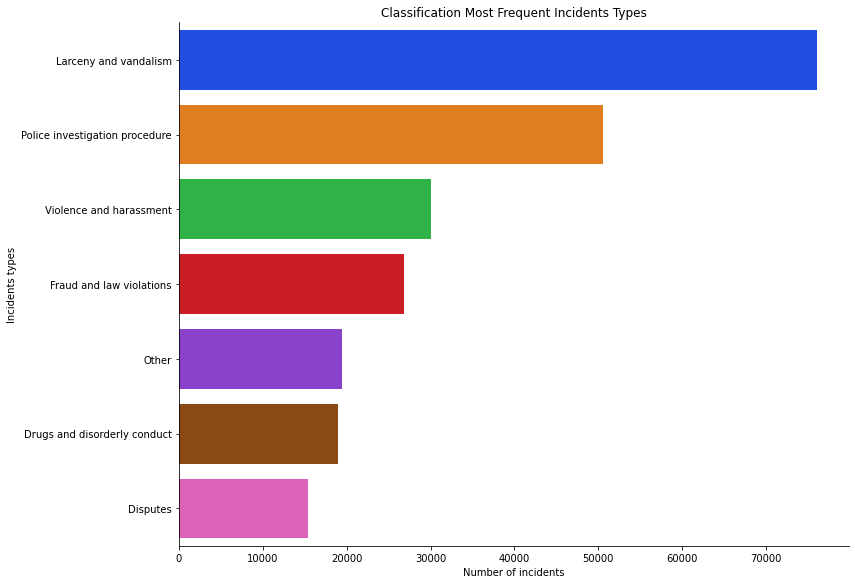

In [14]:
# Classification Incidents Types
sns.catplot(y='OFFENSE_CODE_GROUP',
            kind='count',
            height=8, 
            aspect=1.5,
            order=data.OFFENSE_CODE_GROUP.value_counts().index,
            data=data,
            palette='bright')
plt.title('Classification Most Frequent Incidents Types')
plt.xlabel('Number of incidents')
plt.ylabel('Incidents types');

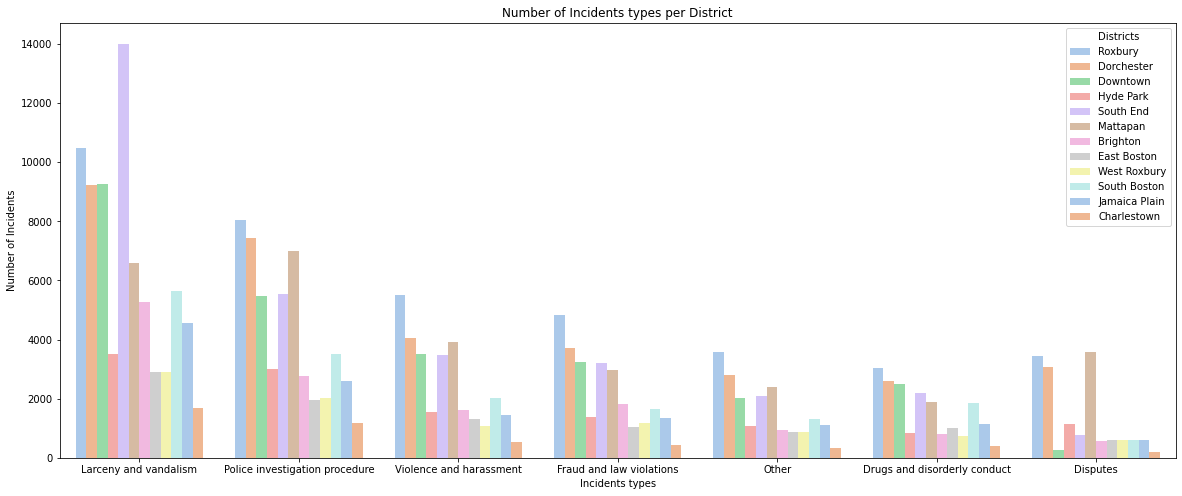

In [15]:
# Incident types per district
plt.figure(1, figsize=(20,8))
sns.countplot(data = data, x='OFFENSE_CODE_GROUP',hue='NAME', palette='pastel', order=data.OFFENSE_CODE_GROUP.value_counts().index)
plt.title('Number of Incidents types per District')
plt.xlabel('Incidents types')
plt.ylabel('Number of Incidents')
plt.legend(title='Districts');

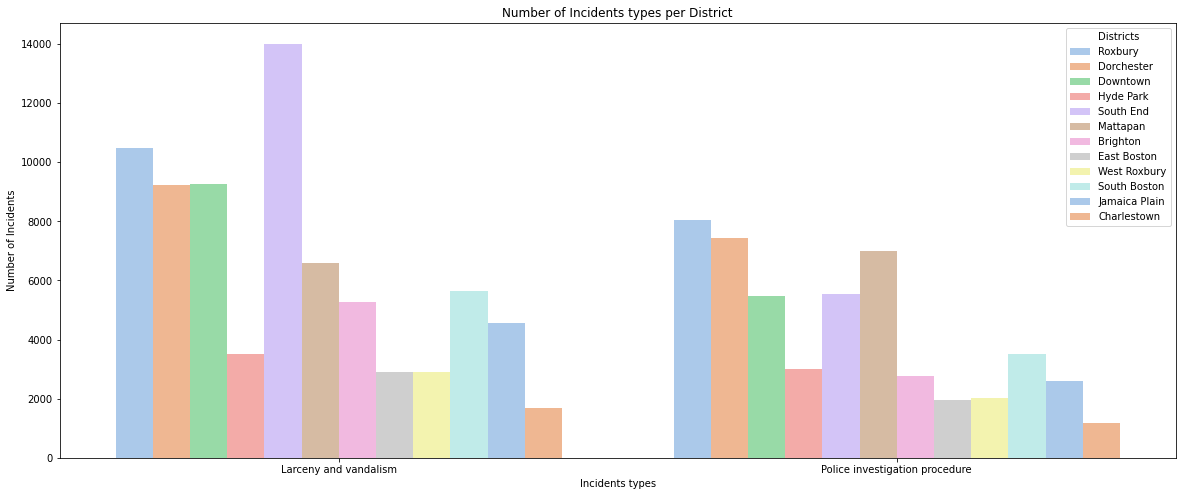

In [16]:
# Incident types per district. Only pour les 2 crimes les plus représentés 
plt.figure(1, figsize=(20,8))
sns.countplot(data = data, x='OFFENSE_CODE_GROUP',hue='NAME', palette='pastel', order=data.OFFENSE_CODE_GROUP.value_counts().head(2).index)
plt.title('Number of Incidents types per District')
plt.xlabel('Incidents types')
plt.ylabel('Number of Incidents')
plt.legend(title='Districts');

In [17]:
# Add le df des most represented crimes ?

# Season

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237221 entries, 0 to 237220
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      237221 non-null  object        
 1   OFFENSE_CODE_GROUP   237221 non-null  object        
 2   SHOOTING             237221 non-null  int64         
 3   OCCURRED_ON_DATE     237221 non-null  datetime64[ns]
 4   LAT                  237221 non-null  float64       
 5   LONG                 237221 non-null  float64       
 6   NAME                 237221 non-null  object        
 7   LAT_POLICE_STATION   237221 non-null  float64       
 8   LONG_POLICE_STATION  237221 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 26.2+ MB


In [19]:
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION
0,I192068249,Other,0,2015-08-28 10:20:00,42.330119,-71.084251,Roxbury,42.328894,-71.085359
1,I182074094,Violence and harassment,0,2015-09-14 09:31:00,42.315142,-71.067047,Roxbury,42.328894,-71.085359
2,I182054888,Violence and harassment,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
3,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
4,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359


In [20]:
# Extract year, month, day
data['year_occured'] = data['OCCURRED_ON_DATE'].apply(lambda x : x.year)
data['month_occured'] = data['OCCURRED_ON_DATE'].apply(lambda x : x.month)
data['day_occured'] = data['OCCURRED_ON_DATE'].apply(lambda x : x.day)
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION,year_occured,month_occured,day_occured
0,I192068249,Other,0,2015-08-28 10:20:00,42.330119,-71.084251,Roxbury,42.328894,-71.085359,2015,8,28
1,I182074094,Violence and harassment,0,2015-09-14 09:31:00,42.315142,-71.067047,Roxbury,42.328894,-71.085359,2015,9,14
2,I182054888,Violence and harassment,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,2015,7,12
3,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,2015,7,12
4,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,2015,7,12


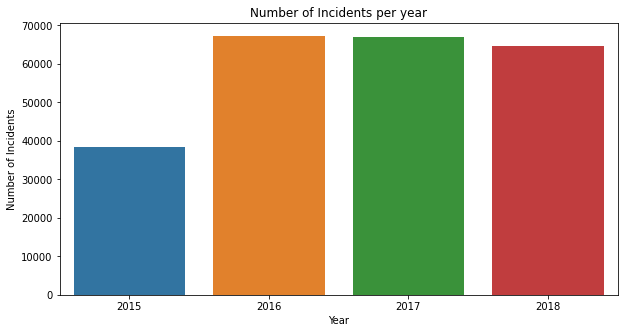

In [21]:
# Number of Incidents per year
plt.figure(1, figsize=(10,5))
sns.countplot(data=data, x='year_occured')
plt.title('Number of Incidents per year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents');

In [22]:
# Attention, on enlève l'année 2015 car incomplète
temp = data[data['year_occured'] != 2015]
temp['year_occured'].unique()

array([2016, 2017, 2018])

In [23]:
temp.shape

(198714, 12)

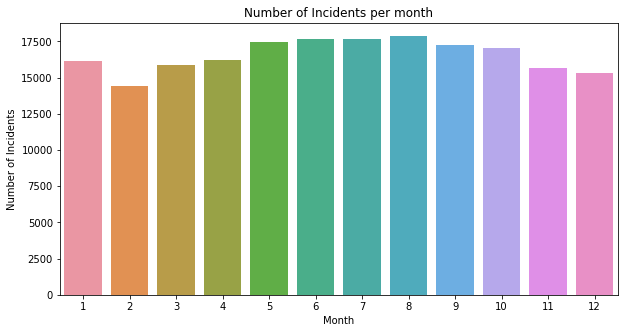

In [24]:
# Number of Incidents per month
plt.figure(1, figsize=(10,5))
sns.countplot(data=temp, x='month_occured')
plt.title('Number of Incidents per month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents');

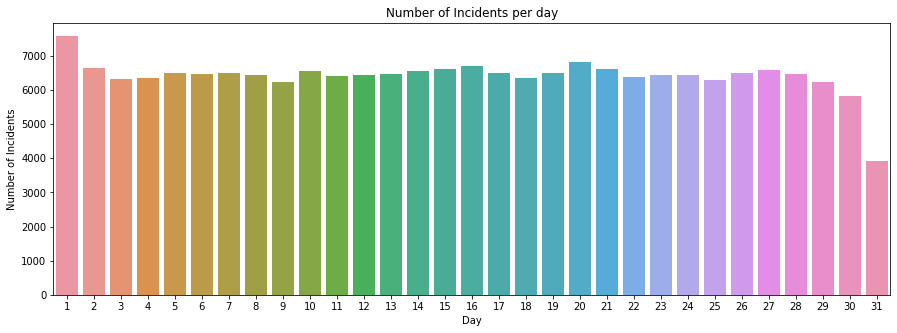

In [25]:
# Number of Incidents per day
plt.figure(1, figsize=(15,5))
sns.countplot(data=temp, x='day_occured')
plt.title('Number of Incidents per day')
plt.xlabel('Day')
plt.ylabel('Number of Incidents');

<AxesSubplot:xlabel='month_occured', ylabel='OFFENSE_CODE_GROUP'>

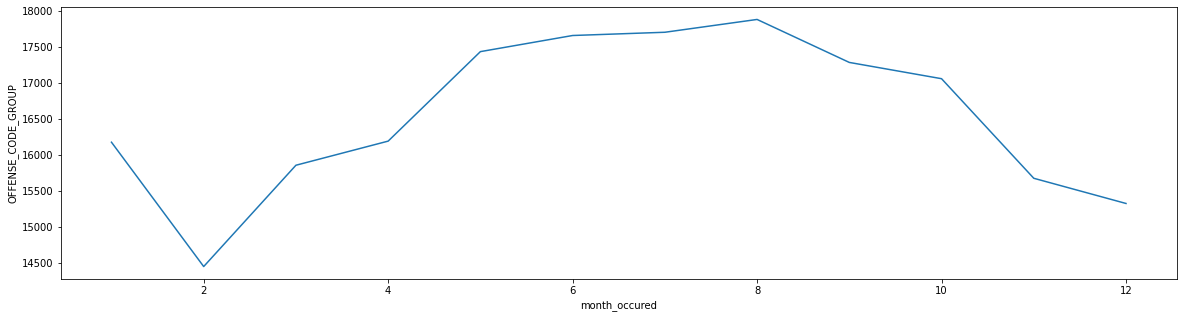

In [26]:
# Attention, on enlève l'année 2015 car incomplète
plt.figure(1, figsize=(20,5))
temp1 = temp.groupby(['month_occured']).count()
sns.lineplot(data = temp1, x='month_occured', y='OFFENSE_CODE_GROUP')

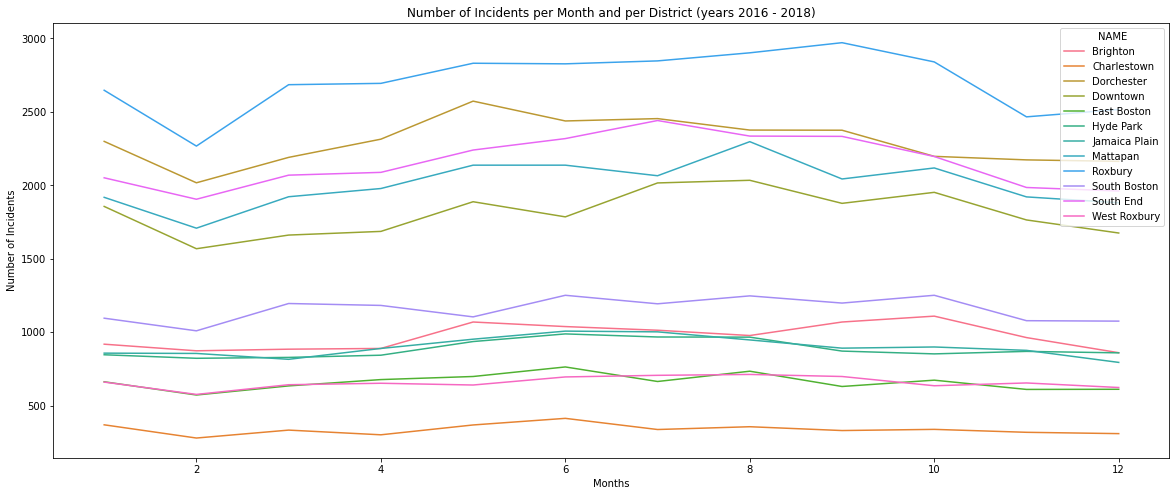

In [27]:
# Number of Incidents per Month and per District
plt.figure(1, figsize=(20,8))
temp2 = temp.groupby(['month_occured', 'NAME']).count()
sns.lineplot(data = temp2, x='month_occured', y='OFFENSE_CODE_GROUP', hue='NAME')
plt.title('Number of Incidents per Month and per District (years 2016 - 2018)')
plt.xlabel('Months')
plt.ylabel('Number of Incidents');

In [28]:
temp.year_occured.unique()

array([2016, 2017, 2018])

In [29]:
temp.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION,year_occured,month_occured,day_occured
6384,I192071292,Fraud and law violations,0,2016-09-06 13:01:00,42.311296,-71.077283,Roxbury,42.328894,-71.085359,2016,9,6
6385,I192069941,Fraud and law violations,0,2016-06-21 12:00:00,42.339170,-71.103583,Roxbury,42.328894,-71.085359,2016,6,21
6386,I192069941,Larceny and vandalism,0,2016-06-21 12:00:00,42.339170,-71.103583,Roxbury,42.328894,-71.085359,2016,6,21
6387,I192059942,Police investigation procedure,0,2016-09-01 00:00:00,42.324539,-71.088218,Roxbury,42.328894,-71.085359,2016,9,1
6388,I192039161,Violence and harassment,0,2016-01-01 00:00:00,42.305248,-71.080894,Roxbury,42.328894,-71.085359,2016,1,1


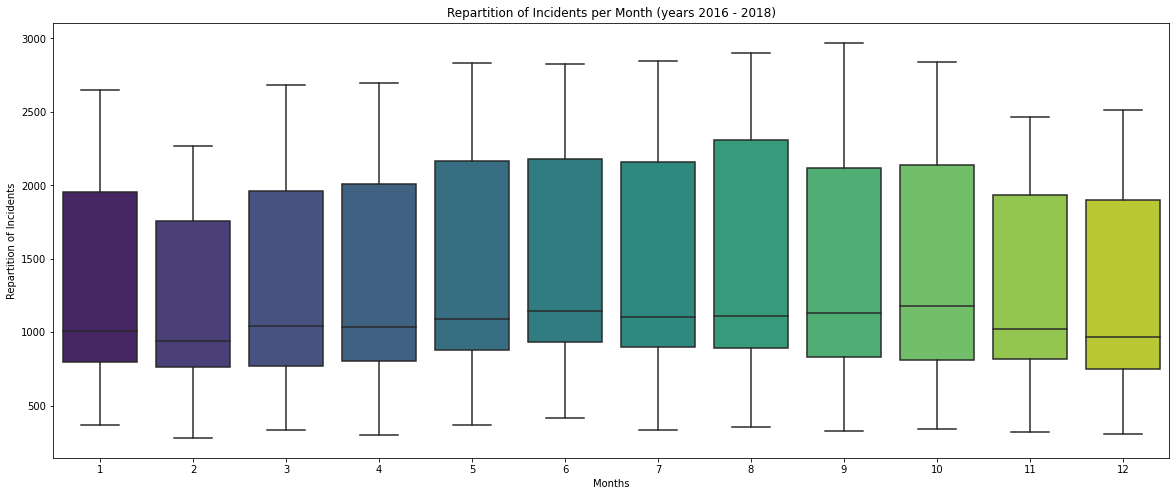

In [30]:
# Repartition of incidents
plt.figure(1, figsize=(20,8))
temp3 = temp.groupby(['month_occured','NAME']).count()
sns.boxplot(data = temp3.reset_index(), x='month_occured', y = 'OFFENSE_CODE_GROUP', palette='viridis')
plt.title('Repartition of Incidents per Month (years 2016 - 2018)')
plt.xlabel('Months')
plt.ylabel('Repartition of Incidents');

# Average distance to the police station per district

In [47]:
# Load the dataset
from data import load_data_viz_data

data = load_data_viz_data()
data[['LAT','LONG']] = data[['LAT','LONG']].astype('float64')

print("Shape of the DataFrame:", data.shape)

data.head()

Shape of the DataFrame: (237221, 9)


,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION
0,I192068249,Other,0,2015-08-28 10:20:00,42.330119,-71.084251,Roxbury,42.328894,-71.085359
1,I182074094,Violence and harassment,0,2015-09-14 09:31:00,42.315142,-71.067047,Roxbury,42.328894,-71.085359
2,I182054888,Violence and harassment,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
3,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
4,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359


In [48]:
# Clean des LAT & LONG
data['LAT'].replace(-1, None, inplace=True)
data['LONG'].replace(-1, None, inplace=True)

In [49]:
# Haversine distance function
from math import radians, sin, cos, asin, sqrt

def haversine_distance(lon1, lat1, lon2, lat2):
    """
    Compute distance (km) between two pairs of (lat, lng) coordinates
    See - (https://en.wikipedia.org/wiki/Haversine_formula)
    """
    
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    
    return 2 * 6371 * asin(sqrt(a))

In [50]:
# Create the new column with distance
distance_df = pd.DataFrame(data)
distance_df['average_distance'] = distance_df.apply(lambda x: haversine_distance(x.LONG, x.LAT, x.LONG_POLICE_STATION, x.LAT_POLICE_STATION), axis=1)
distance_df_redu = pd.DataFrame(distance_df[['NAME', 'average_distance']].groupby(by='NAME')['average_distance'].mean())
distance_df_redu

,average_distance
NAME,
Brighton,1.314364
Charlestown,1.941586
Dorchester,1.373183
Downtown,0.858901
East Boston,1.203917
Hyde Park,1.723225
Jamaica Plain,1.263525
Mattapan,1.311253
Roxbury,1.465541


In [51]:
# average distance between the police station and the offenses in the Brighton district
average_distance_km = distance_df_redu['average_distance'][0]
average_distance_km

1.3143642757881546

<AxesSubplot:xlabel='average_distance', ylabel='Count'>

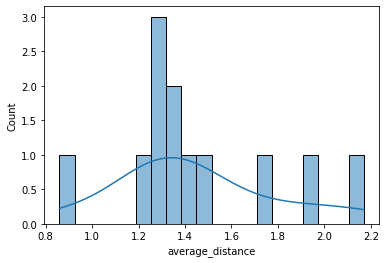

In [52]:
sns.histplot(distance_df_redu['average_distance'], bins=20, kde=True)

In [53]:
distance_df.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION,average_distance
0,I192068249,Other,0,2015-08-28 10:20:00,42.330119,-71.084251,Roxbury,42.328894,-71.085359,0.163832
1,I182074094,Violence and harassment,0,2015-09-14 09:31:00,42.315142,-71.067047,Roxbury,42.328894,-71.085359,2.145919
2,I182054888,Violence and harassment,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,2.021175
3,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,2.021175
4,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,2.021175


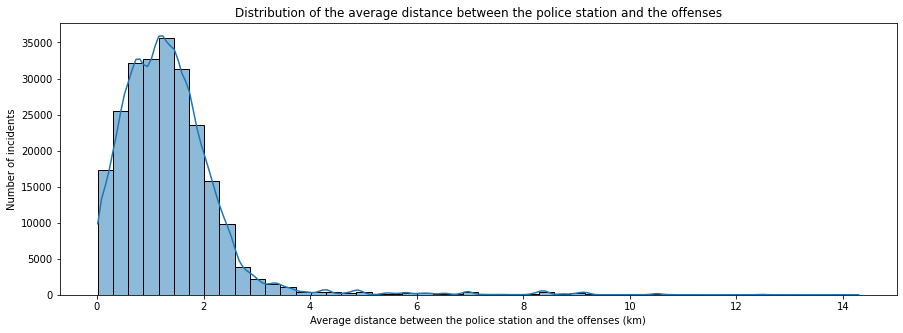

In [58]:
# Distribution of the average distance between the police station and the offenses
plt.figure(1, figsize=(15,5))
sns.histplot(distance_df['average_distance'], bins=50, kde=True)
plt.title('Distribution of the average distance between the police station and the offenses')
plt.xlabel('Average distance between the police station and the offenses (km)')
plt.ylabel('Number of incidents');